In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


def btc_block(img_block):
    """
    This function will calculate the coefficient and bitmap of the BTC Algorithm.
    """
    m = img_block.shape[0] * img_block.shape[1]
    h = float(np.sum(img_block) / (img_block.shape[0] * img_block.shape[1]))
    h2 = float(np.sum(img_block ** 2) / (img_block.shape[0] * img_block.shape[1]))
    sigma2 = np.var(img_block)
    sigma = np.std(img_block)
    q = img_block[np.where(img_block > h)].shape[0]
    a = h - sigma * math.sqrt(float(q) / (m - q))
    b = h + sigma * math.sqrt((m - q) / float(q))
    bitmap = np.zeros((img_block.shape[0], img_block.shape[1]))
    result = img_block.copy()
    for i in range(0, img_block.shape[0]):
        for j in range(0, img_block.shape[1]):
            if (img_block[i, j] >= h):
                bitmap[i, j] = 1
                result[i, j] = round(b, 0)
            else:
                result[i, j] = round(a, 0)
    return bitmap, result


In [2]:
# Example image block (8x8)
img_block = np.array([
    [100, 120, 130, 140, 160, 180, 200, 220],
    [110, 130, 140, 150, 170, 190, 210, 230],
    [120, 140, 150, 160, 180, 200, 220, 240],
    [130, 150, 160, 170, 190, 210, 230, 250],
    [140, 160, 170, 180, 200, 220, 240, 255],
    [150, 170, 180, 190, 210, 230, 250, 255],
    [160, 180, 190, 200, 220, 240, 255, 255],
    [170, 190, 200, 220, 240, 255, 255, 255]
])

# Apply BTC algorithm to the image block
bitmap, result = btc_block(img_block)

# Print the results
print("Original Image Block:")
print(img_block)
print("\nBinary Bitmap:")
print(bitmap)
print("\nResulting Coefficient Image:")
print(result)


Original Image Block:
[[100 120 130 140 160 180 200 220]
 [110 130 140 150 170 190 210 230]
 [120 140 150 160 180 200 220 240]
 [130 150 160 170 190 210 230 250]
 [140 160 170 180 200 220 240 255]
 [150 170 180 190 210 230 250 255]
 [160 180 190 200 220 240 255 255]
 [170 190 200 220 240 255 255 255]]

Binary Bitmap:
[[0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1.]]

Resulting Coefficient Image:
[[151 151 151 151 151 151 237 237]
 [151 151 151 151 151 151 237 237]
 [151 151 151 151 151 237 237 237]
 [151 151 151 151 151 237 237 237]
 [151 151 151 151 237 237 237 237]
 [151 151 151 151 237 237 237 237]
 [151 151 151 237 237 237 237 237]
 [151 151 237 237 237 237 237 237]]


In [12]:
def btc_full_img(img, block):
    """
    This function will doing Block Truncation Coding of one entire image.
    """
    result = img.copy()
    bitmap = img.copy()
    count = 0
    for i in range(0, img.shape[0], block):
        for j in range(0, img.shape[1], block):
            bitmap[i: i + block, j: j + block], result[i: i + block, j: j + block] = btc_block(
                img[i: i + block, j: j + block])
            count += 1
    return bitmap, result

In [26]:
def load_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    print(image.shape)
    fig = plt.gcf()
    fig.set_figheight(10)
    fig.set_figwidth(10)
#     plt.imshow(image, cmap='gray')
#     plt.show()  
    
    return image

In [32]:
image_inp = load_image("D:\projects\BTC\lena.png")
bit_map , result = btc_full_img(image_inp,8)

(512, 512)


<Figure size 1000x1000 with 0 Axes>

In [36]:
import os

def save_img(image, name, size, output_folder):
    """
    This function will plot and save the image.
    """
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, name)
    
    # Save the image
    cv2.imwrite(output_path, image)
    
    # Plot and display the image
    fig = plt.gcf()
    fig.set_figheight(size)
    fig.set_figwidth(size)
    plt.imshow(image, cmap='gray')
    plt.show()

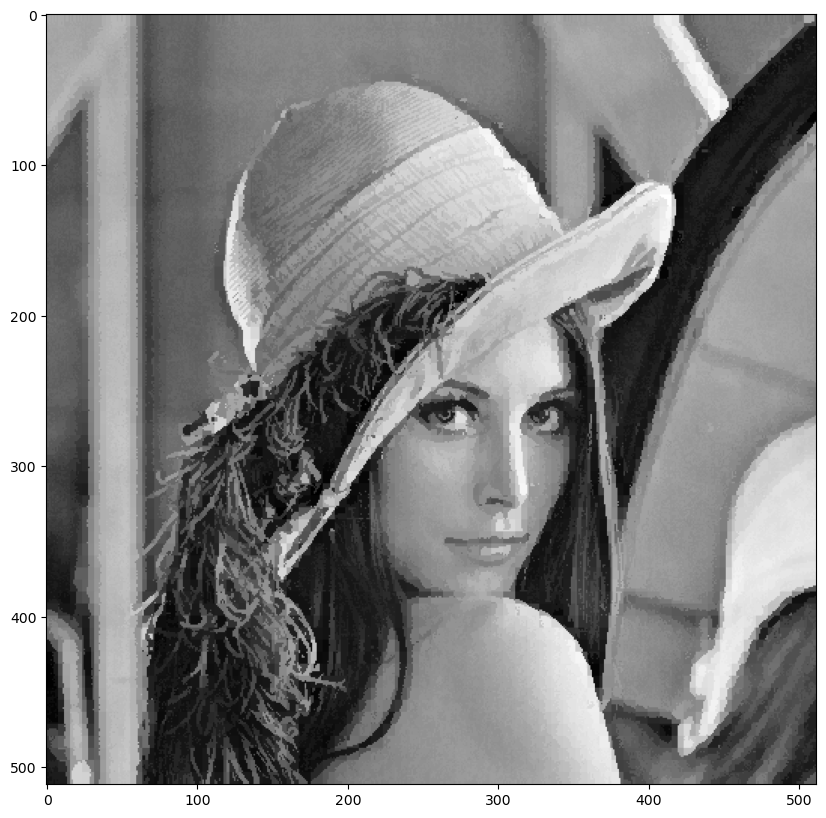

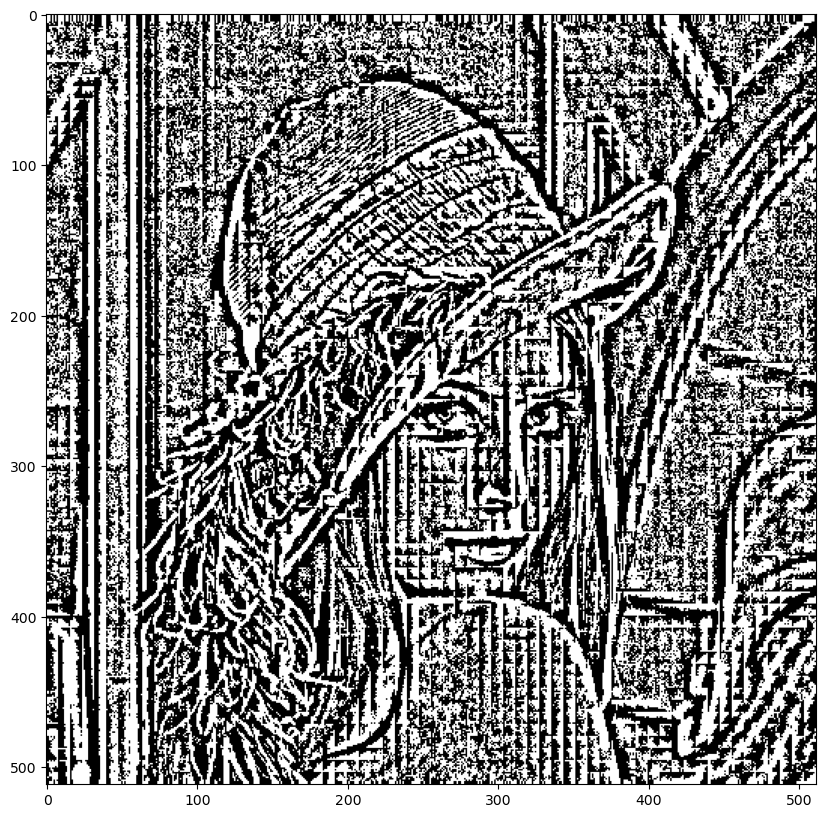

In [37]:

output_folder = "D:/projects/BTC"
save_img(result, "result_image.png", 10, output_folder)
save_img(bit_map,"bit_map.png",10,output_folder)